### CREDIT CARD FRAUD DETECTIOIN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape


(284807, 31)

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
## determine number of fraud cases in dataset

In [7]:
fraud = data[data['Class']==1]
valid = data[data['Class']==0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Farud Cases: {}'.format(len(data[data['Class']==1])))
print('Valid Transacation: {}'.format(len(data[data['Class']==0])))

0.0017304750013189597
Farud Cases: 492
Valid Transacation: 284315


In [8]:
## print the amount details for fraudulent transaction

In [9]:
print("Amount details of the fraudulaent transaction")
fraud.Amount.describe()

Amount details of the fraudulaent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
## print the details of valid transaction 

In [11]:
print("details of vlid transaction ")
valid.Amount.describe

details of vlid transaction 


<bound method NDFrame.describe of 0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284315, dtype: float64>

In [12]:
## ploting the Correlation matrix

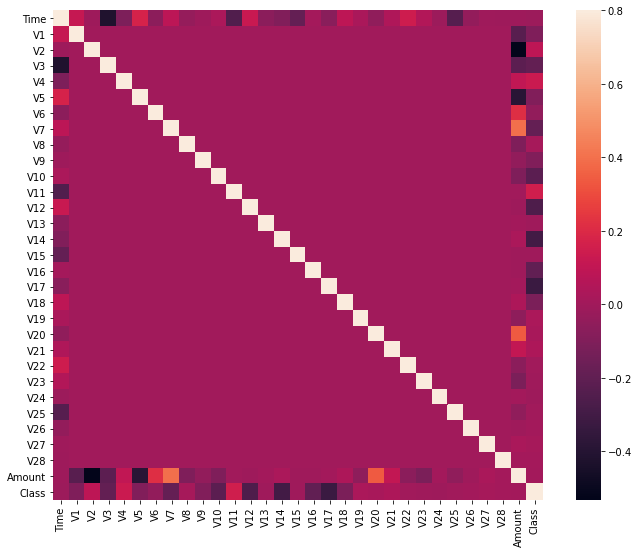

In [13]:
corrmat = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

In [14]:
## dividing the X and Y from tht dataset

In [15]:
X = data.drop(['Class'], axis=1)
y = data['Class']

In [16]:
## train and test the model

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=101)

1. Random forest Model

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [21]:
y_pred = rfc.predict(X_test)

In [22]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
## Building all kinds of evaluating parametres

In [24]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [25]:
n_outliers = len(fraud)
n_errors = (y_pred !=y_test).sum()
print("The model used is Random Forest classifier")

The model used is Random Forest classifier


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94775
           1       0.93      0.79      0.86       161

    accuracy                           1.00     94936
   macro avg       0.97      0.89      0.93     94936
weighted avg       1.00      1.00      1.00     94936



In [27]:
print("Accuracy:",format(accuracy_score(y_test,y_pred)))
print("Mathews:",format(matthews_corrcoef(y_test,y_pred)))


Accuracy: 0.9995470632847392
Mathews: 0.8580483709708256


In [28]:
## Visualising the confusion matrix

In [29]:
print(confusion_matrix(y_test,y_pred))

[[94766     9]
 [   34   127]]


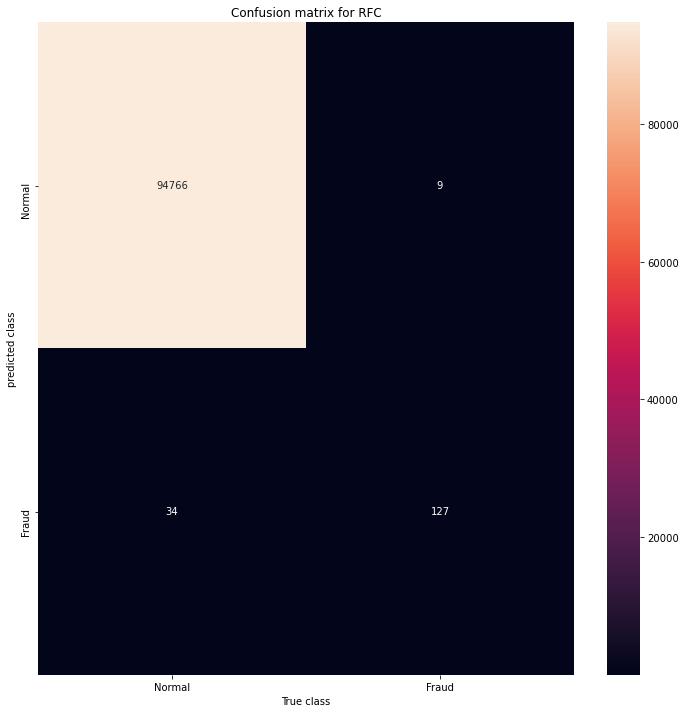

In [30]:
LABELS=['Normal','Fraud']
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix,xticklabels=LABELS,yticklabels=LABELS,annot=True,fmt='d')
plt.title("Confusion matrix for RFC")
plt.xlabel('True class')
plt.ylabel('predicted class')
plt.show()

### 2.Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
leg = LogisticRegression()

In [33]:
leg.fit(X_train,y_train)


C:\Users\krish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
l_pred = leg.predict(X_test)

In [35]:
l_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
print(classification_report(y_test,l_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94775
           1       0.76      0.72      0.74       161

    accuracy                           1.00     94936
   macro avg       0.88      0.86      0.87     94936
weighted avg       1.00      1.00      1.00     94936



In [37]:
print("Accuracy:",format(accuracy_score(y_test,l_pred)))
print("Mathews:",format(matthews_corrcoef(y_test,l_pred)))

Accuracy: 0.9991362602174096
Mathews: 0.7386617704124057


In [38]:
print(confusion_matrix(y_test,l_pred))

[[94738    37]
 [   45   116]]


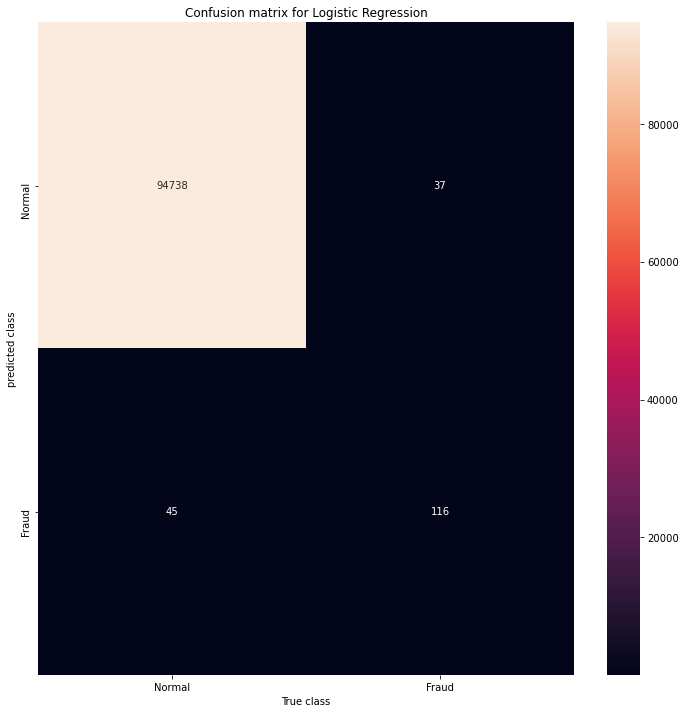

In [39]:
LABELS=['Normal','Fraud']
conf_matrix = confusion_matrix(y_test,l_pred)
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix,xticklabels=LABELS,yticklabels=LABELS,annot=True,fmt='d')
plt.title("Confusion matrix for Logistic Regression")
plt.xlabel('True class')
plt.ylabel('predicted class')
plt.show()

### 3.NAIVE BAYES

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
nb = GaussianNB()

In [42]:
nb.fit(X_train,y_train)
n_pred=nb.predict(X_test)

In [43]:
n_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
print(classification_report(y_test,n_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     94775
           1       0.14      0.66      0.23       161

    accuracy                           0.99     94936
   macro avg       0.57      0.83      0.61     94936
weighted avg       1.00      0.99      0.99     94936



In [45]:
print("Accuracy:",format(accuracy_score(y_test,l_pred)))
print("Mathews:",format(matthews_corrcoef(y_test,l_pred)))

Accuracy: 0.9991362602174096
Mathews: 0.7386617704124057


In [46]:
print(confusion_matrix(y_test,n_pred))


[[94110   665]
 [   54   107]]


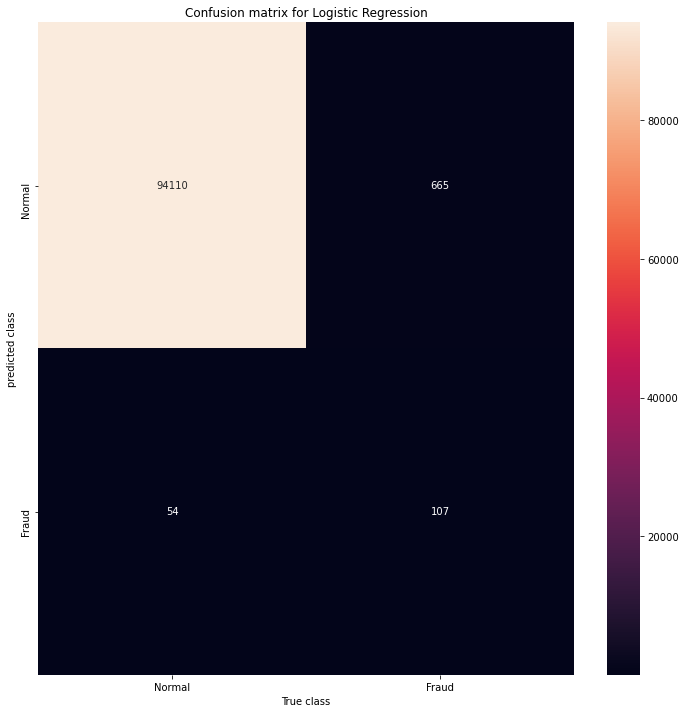

In [48]:
LABELS=['Normal','Fraud']
conf_matrix = confusion_matrix(y_test,n_pred)
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix,xticklabels=LABELS,yticklabels=LABELS,annot=True,fmt='d')
plt.title("Confusion matrix for Logistic Regression")
plt.xlabel('True class')
plt.ylabel('predicted class')
plt.show()

### 4.Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [51]:
d_pred = dtc.predict(X_test)

In [52]:
d_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
print(classification_report(y_test,n_pred))
print("Accuracy:",format(accuracy_score(y_test,l_pred)))
print("Mathews:",format(matthews_corrcoef(y_test,l_pred)))
print("Confusion_matrix will be:",format(confusion_matrix(y_test,n_pred)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     94775
           1       0.14      0.66      0.23       161

    accuracy                           0.99     94936
   macro avg       0.57      0.83      0.61     94936
weighted avg       1.00      0.99      0.99     94936

Accuracy: 0.9991362602174096
Mathews: 0.7386617704124057
Confusion_matrix will be: [[94110   665]
 [   54   107]]


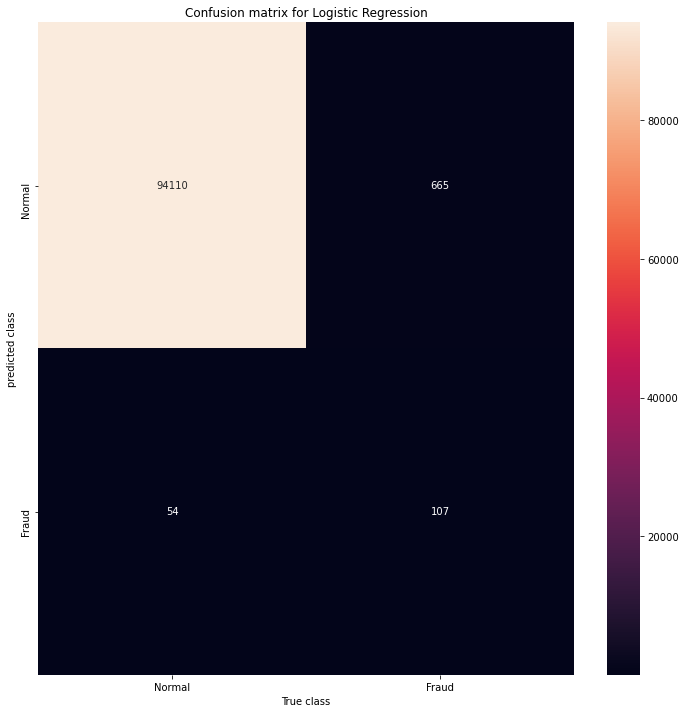

In [60]:
LABELS=['Normal','Fraud']
conf_matrix = confusion_matrix(y_test,d_pred)
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix,xticklabels=LABELS,yticklabels=LABELS,annot=True,fmt='d')
plt.title("Confusion matrix for Logistic Regression")
plt.xlabel('True class')
plt.ylabel('predicted class')
plt.show()